# Introduction to Portfolio Theory: Benchmark #

Our dear friend Nancy is now happy because, fortunately, we were in the universe where she chose Nvidia for her first investment in 2018. But now she is questioning herself: “Did I choose the best investment from all the possible investments?” She goes to Thomas again, and he recommends that she look for a benchmark to compare her Nvidia investment against the market.

Now she is confused again: What is a benchmark, then? And how can she select the proper one?

In [2]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import skew, kurtosis
from scipy.stats import jarque_bera
from scipy.stats import probplot
from scipy.stats import norm

# Visualization
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from functions import import_daily_financial_data

In [15]:
# Call the data for different benchmarks

# S&P500
data_sp500 = import_daily_financial_data('^GSPC', '2015-01-01', '2025-01-01')

# Dow Jones
data_dj = import_daily_financial_data('^DJI', '2015-01-01', '2025-01-01')

# Nasdaq-100
data_ndx = import_daily_financial_data('^NDX', '2015-01-01', '2025-01-01')

# iShares U.S. Technology ETF
data_iwy = import_daily_financial_data('IWY', '2015-01-01', '2025-01-01')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
# Data for Benchmarks
benchmark_prices = pd.DataFrame(index=data_sp500.index)

# Create the columns
benchmark_prices['SP500'] = data_sp500['Close']
benchmark_prices['DJ'] = data_dj['Close']
benchmark_prices['NDX'] = data_ndx['Close']
benchmark_prices['IWY'] = data_iwy['Close']

benchmark_prices

,SP500,DJ,NDX,IWY
Date,,,,
2015-01-02,2058.199951,17832.990234,4230.240234,45.318775
2015-01-05,2020.579956,17501.650391,4160.959961,44.562859
2015-01-06,2002.609985,17371.640625,4110.830078,44.148914
2015-01-07,2025.900024,17584.519531,4160.000000,44.715828
2015-01-08,2062.139893,17907.869141,4240.549805,45.543751
...,...,...,...,...
2024-12-24,6040.040039,43297.031250,21797.650391,243.761948
2024-12-26,6037.589844,43325.800781,21768.310547,243.322418
2024-12-27,5970.839844,42992.210938,21473.019531,239.776321


In [17]:
# Calculate Logarithmic Returns
def log_returns(
        price_series: pd.Series
):
    return np.log(price_series / price_series.shift(1))

In [18]:
# Calculate the Returns

benchmark_returns = log_returns(benchmark_prices)
benchmark_returns.dropna(inplace=True)

benchmark_returns

,SP500,DJ,NDX,IWY
Date,,,,
2015-01-05,-0.018447,-0.018755,-0.016513,-0.016821
2015-01-06,-0.008933,-0.007456,-0.012121,-0.009332
2015-01-07,0.011563,0.012180,0.011890,0.012759
2015-01-08,0.017730,0.018221,0.019178,0.018346
2015-01-09,-0.008439,-0.009567,-0.006452,-0.007537
...,...,...,...,...
2024-12-24,0.010982,0.009050,0.013602,0.013657
2024-12-26,-0.000406,0.000664,-0.001347,-0.001805
2024-12-27,-0.011117,-0.007729,-0.013658,-0.014681


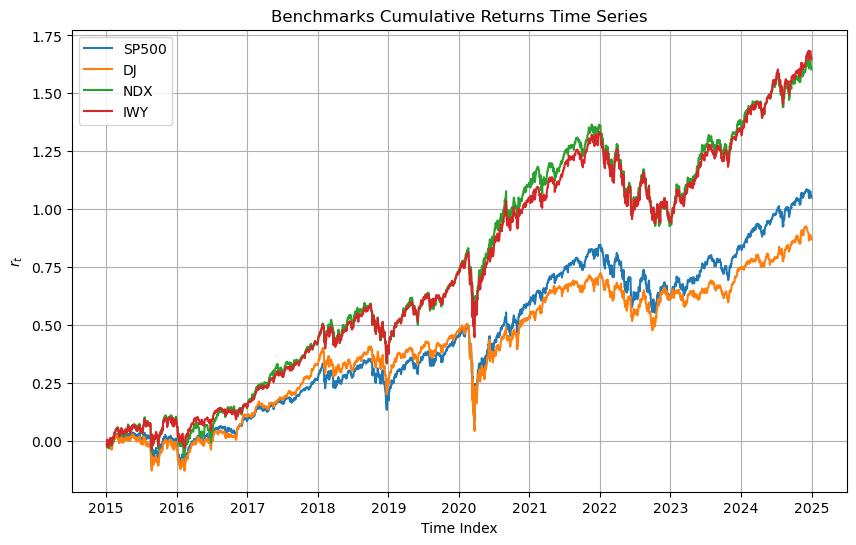

In [19]:
# Time Series Graphs
plt.figure(figsize=(10, 6))
plt.plot(benchmark_returns.cumsum(), label=benchmark_returns.columns, alpha=1)

# Config
plt.title('Benchmarks Cumulative Returns Time Series')
plt.xlabel('Time Index')
plt.ylabel('$r_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

In [20]:
# Check Daily
benchmark_returns.mul(100).mean()

SP500    0.041750
DJ       0.034572
NDX      0.063731
IWY      0.065444
dtype: float64

In [21]:
# Check Annualized Returns
benchmark_returns.mul(100).mean() * 252

SP500    10.520896
DJ        8.712225
NDX      16.060296
IWY      16.491855
dtype: float64

In [22]:
# Check Daily Volatility
benchmark_returns.mul(100).std()

SP500    1.126972
DJ       1.109134
NDX      1.392252
IWY      1.276678
dtype: float64

In [24]:
# Check Annualized Volatility
benchmark_returns.mul(100).std() * np.sqrt(252)

SP500    17.890132
DJ       17.606956
NDX      22.101308
IWY      20.266627
dtype: float64

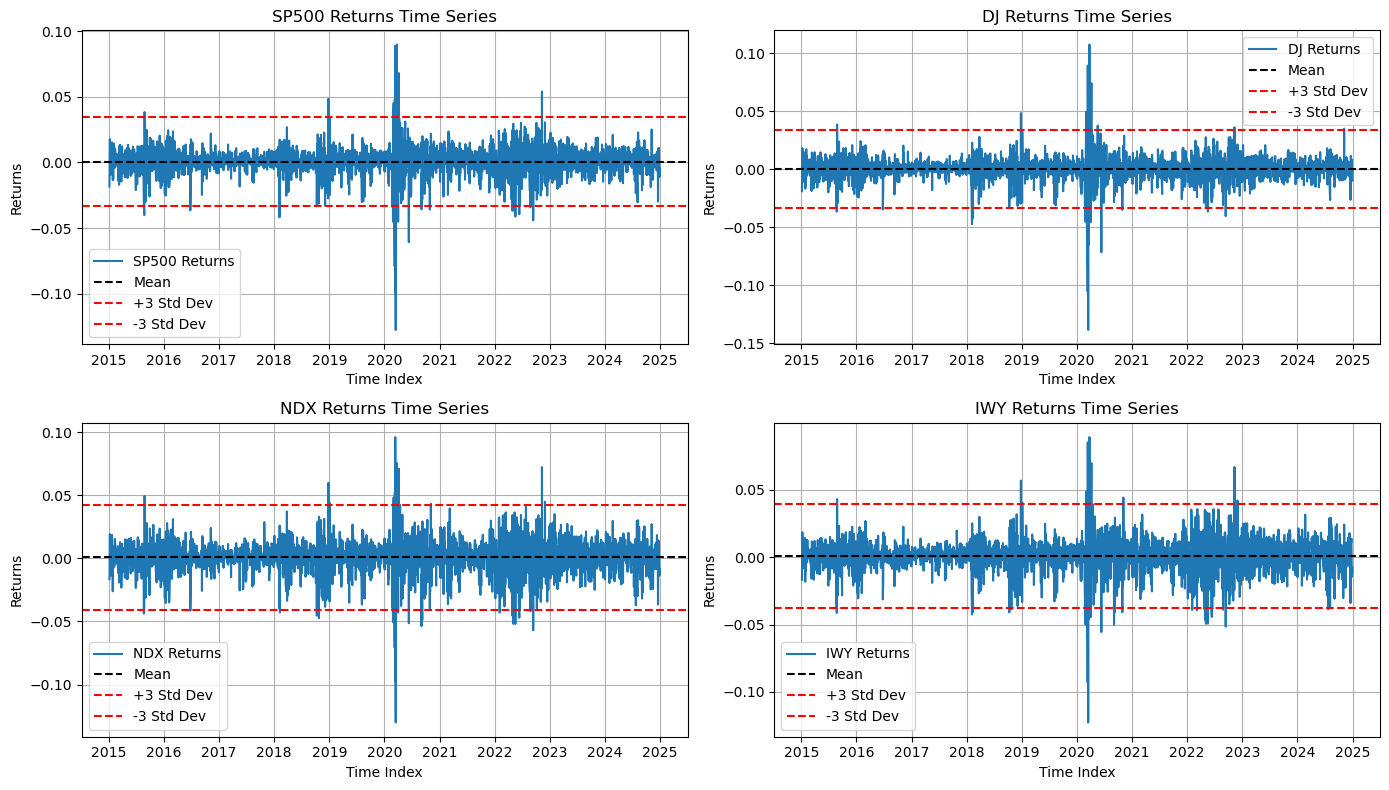

In [25]:
# Set number of subplot columns
n_cols = 2
n_rows = int(np.ceil(len(benchmark_returns.columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  # Flatten to 1D array

# Loop through each column and plot
for i, column in enumerate(benchmark_returns.columns):
    data = benchmark_returns[column].dropna()
    mean = data.mean()
    std = data.std()
    upper_lim = mean + 3 * std
    lower_lim = mean - 3 * std

    axes[i].plot(data, label=f'{column} Returns', alpha=1)
    axes[i].axhline(y=mean, color='black', linestyle='dashed', label='Mean')
    axes[i].axhline(y=upper_lim, color='red', linestyle='dashed', label='+3 Std Dev')
    axes[i].axhline(y=lower_lim, color='red', linestyle='dashed', label='-3 Std Dev')

    axes[i].set_title(f'{column} Returns Time Series')
    axes[i].set_xlabel('Time Index')
    axes[i].set_ylabel('Returns')
    axes[i].legend()
    axes[i].grid(True)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

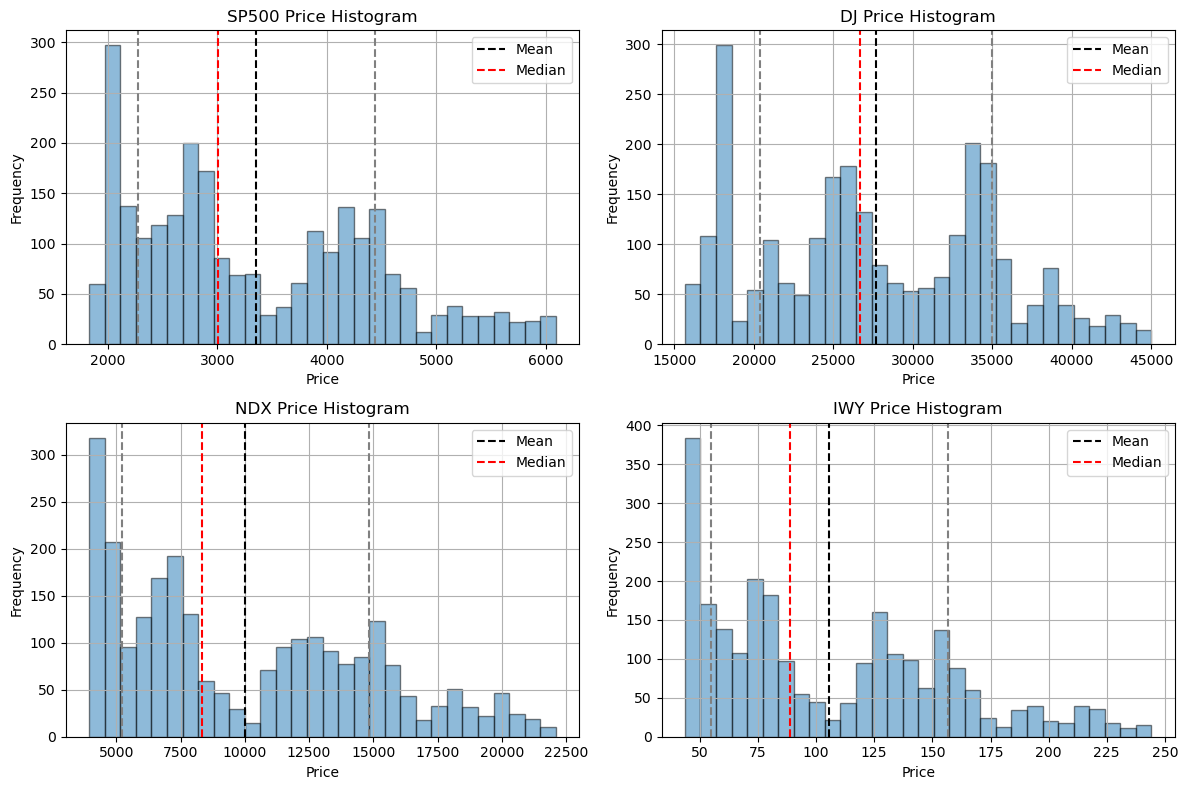

In [26]:
# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # Flatten in case of 1D

# Plot each column
for i, column in enumerate(benchmark_prices.columns):
    data = benchmark_prices[column].dropna()
    mean_p = data.mean()
    median_p = data.median()
    std_p = data.std()
    upper_lim_p = mean_p + std_p
    lower_lim_p = mean_p - std_p

    axes[i].hist(data, bins=30, alpha=0.5, edgecolor='black')
    axes[i].axvline(x=mean_p, color='black', linestyle='dashed', label='Mean')
    axes[i].axvline(x=median_p, color='red', linestyle='dashed', label='Median')
    axes[i].axvline(x=upper_lim_p, color='grey', linestyle='dashed')
    axes[i].axvline(x=lower_lim_p, color='grey', linestyle='dashed')
    
    axes[i].set_title(f'{column} Price Histogram')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True)

# Hide any unused subplots if columns < rows*cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

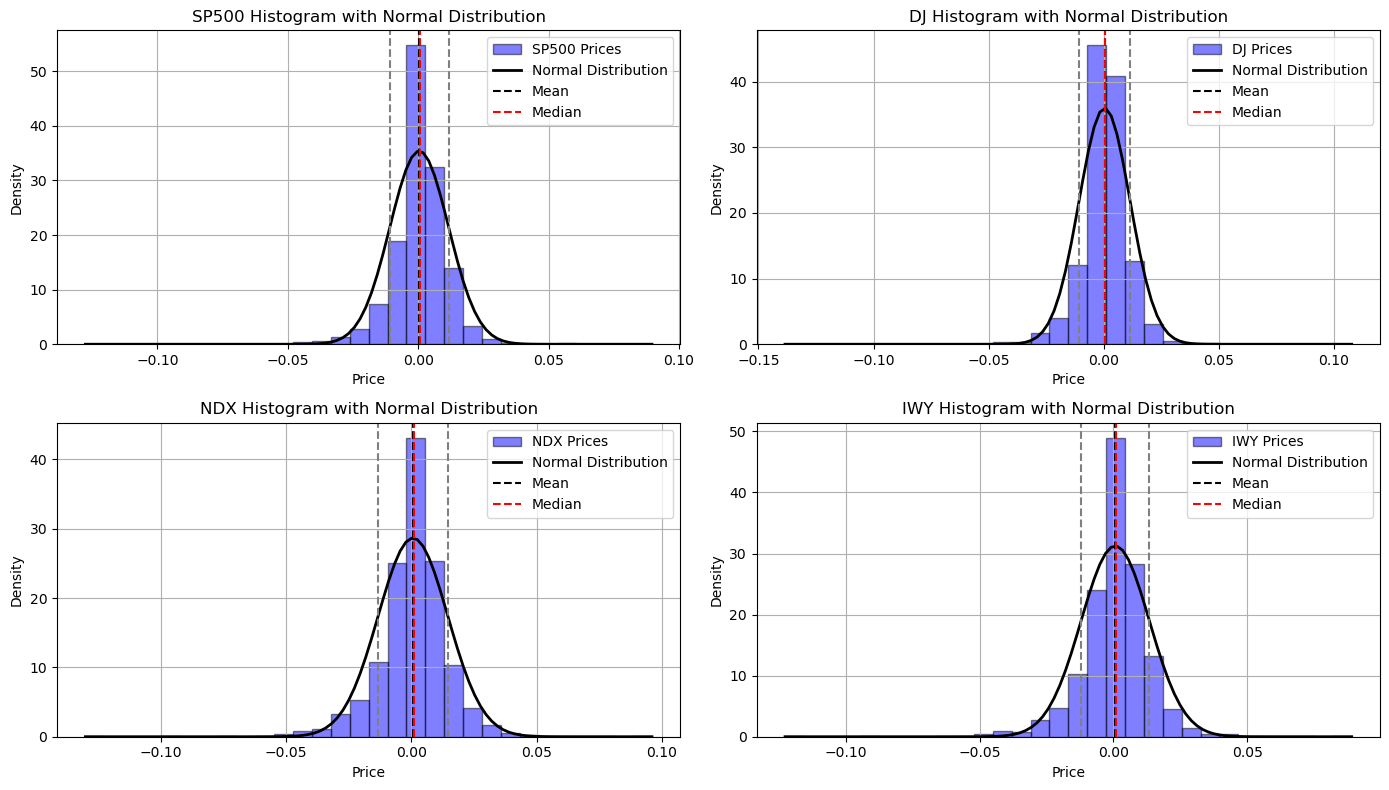

In [27]:
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

# Loop through each column
for i, column in enumerate(benchmark_returns.columns):
    data = benchmark_returns[column].dropna()
    mu = data.mean()
    sigma = data.std()

    # Histogram
    axes[i].hist(data, bins=30, density=True, color='blue', alpha=0.5, edgecolor='black', label=f'{column} Prices')

    # Normal distribution curve
    x = np.linspace(data.min(), data.max(), 100)
    y = norm.pdf(x, mu, sigma)
    axes[i].plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

    # Reference lines
    axes[i].axvline(x=mu, color='black', linestyle='dashed', label='Mean')
    axes[i].axvline(x=data.median(), color='red', linestyle='dashed', label='Median')
    axes[i].axvline(x=mu + sigma, color='grey', linestyle='dashed')
    axes[i].axvline(x=mu - sigma, color='grey', linestyle='dashed')

    # Titles and labels
    axes[i].set_title(f'{column} Histogram with Normal Distribution')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

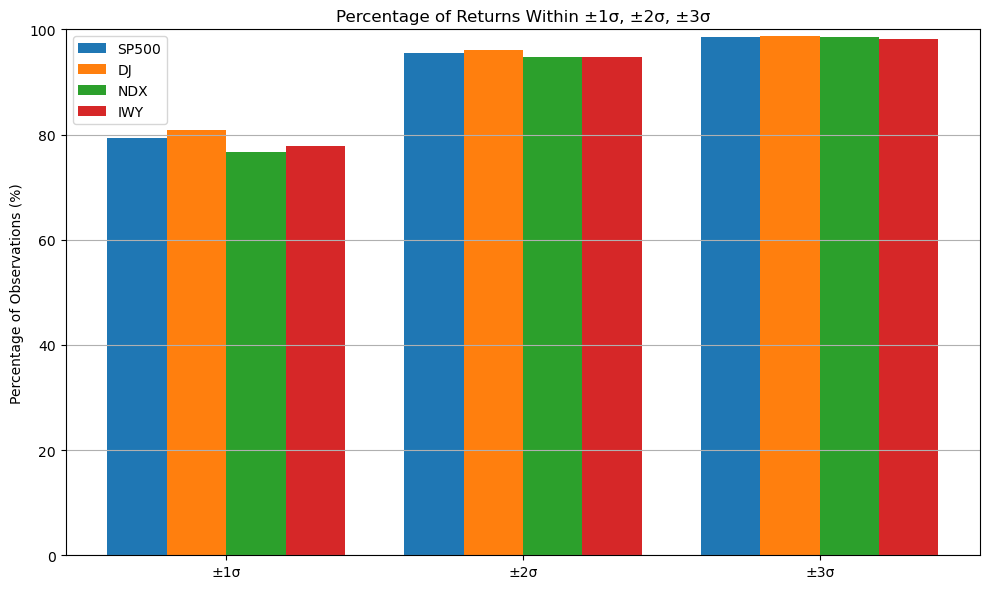

In [28]:
# Define the std ranges to analyze
std_ranges = [1, 2, 3]
benchmark_cols = benchmark_returns.columns
results = {col: [] for col in benchmark_cols}

# Calculate percentage of returns within each std range
for col in benchmark_cols:
    data = benchmark_returns[col].dropna()
    mean = data.mean()
    std = data.std()
    
    for s in std_ranges:
        lower = mean - s * std
        upper = mean + s * std
        pct = ((data >= lower) & (data <= upper)).mean() * 100
        results[col].append(pct)

# Plotting
x = np.arange(len(std_ranges))
bar_width = 0.2

plt.figure(figsize=(10, 6))

for i, col in enumerate(benchmark_cols):
    plt.bar(x + i*bar_width, results[col], width=bar_width, label=col)

plt.xticks(x + bar_width * (len(benchmark_cols) - 1) / 2, [f'±{s}σ' for s in std_ranges])
plt.ylim(0, 100)
plt.ylabel('Percentage of Observations (%)')
plt.title('Percentage of Returns Within ±1σ, ±2σ, ±3σ')
plt.legend()
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

In [29]:
# For some purposes of this course, we are selecting the SP500

# Calculate Mean
mean = benchmark_returns['SP500'].dropna().mean()

# Calculate Variance
variance = benchmark_returns['SP500'].dropna().var()

# Calculate Skewness
skewness = skew(benchmark_returns['SP500'].dropna())

# Calculate Kurtosis
kurt = kurtosis(benchmark_returns['SP500'].dropna())

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Mean: 0.00041749587425788255
Variance: 0.00012700667546369486
Skewness: -0.8099533346078973
Kurtosis: 15.721438587145602


In [30]:
# Normality Test

jb_stat, p_value = jarque_bera(benchmark_returns['SP500'].dropna())

print(f"Jarque-Bera Stat: {jb_stat}")
print(f"p-value: {p_value}")

Jarque-Bera Stat: 26175.672420787363
p-value: 0.0


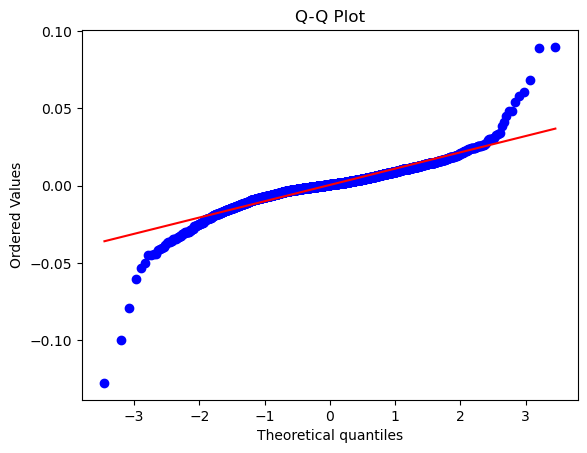

In [31]:
# Prices QQ Plot

probplot(benchmark_returns['SP500'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [34]:
# Store the Benchmark
benchmark = benchmark_prices['SP500']
benchmark.name = 'sp_500'

benchmark

Date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
                 ...     
2024-12-24    6040.040039
2024-12-26    6037.589844
2024-12-27    5970.839844
2024-12-30    5906.939941
2024-12-31    5881.629883
Name: sp_500, Length: 2516, dtype: float64

In [35]:
benchmark.to_csv(r"..\additional_data\sp500.csv")